# **Assignment 2**
## **Artificial Neural Network for Text Sentiment Classification**

Text sentiment classification using neural networks (NN) involves training a model to analyze and classify the sentiment expressed in text, such as positive, negative, or neutral. Neural networks, particularly recurrent networks (RNNs) or transformers (which will be explored subsequently), can capture the sequential nature of text data, making them well-suited for this task. By embedding words into dense vectors, a feed forward neural network can learn to associate patterns in word usage with sentiment labels. During training, the model adjusts its weights to minimize error, enabling it to generalize to unseen text, ultimately predicting sentiment with high accuracy.

====================================================================================================

<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 1**
This code imports necessary libraries for text preprocessing, model building, and evaluation.
1)  It uses <blue>**pandas**</blue> for <green>**data handling**</green>.
2) <blue>**Matplotlib**</blue> for <green>**plotting**</green>.
3) <blue>**NLTK**</blue> for <green>**tokenizing**</green> and <green>**stemming**</green> text.
4) It includes <blue>**scikit-learn**</blue> for <green>**splitting data**</green> and <green>**evaluation (classification_report)**</green>.
5) <blue>**Torch**</blue> is used to <green>**define**</green>, <green>**train**</green>, and <green>**optimize**</green> neural networks.
6) <blue>**gensim**</blue> is used for <green>**dictionary creation**</green> and <green>**token mapping**</green>, helping to convert text into numerical format for model training.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
!pip install gensim
from gensim import corpora
from sklearn.metrics import classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 78.2 MB/s eta 0:00:00


<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 2**
This code <green>**loads**</green> the <blue>**"yelp_reviews_subset_2.csv"**</blue> dataset downloaded from the Notion page.

In [11]:
# TODO: Download and Load the "yelp_reviews_subset_2.csv" dataset uploaded on the notion page using pandas
df = pd.read_csv("yelp_reviews_subset_2.csv") # Replace None with the correct code
df

,Unnamed: 0,Text,Labels
0,0,My expectations for McDonalds are t rarely hig...,0
1,1,I've tried to give this McDonalds a chance but...,0
2,2,This McDonald's is so bad it's amazing. \n\nO...,0
3,3,We had the worst possible experience at the Ea...,0
4,4,They burned my fish and they burned it bad. O...,2
...,...,...,...
495,495,This place is PHENOMENAL.\nI got my bunny here...,4
496,496,"This is a bizarre CVS, the kind you would only...",1
497,497,"I go to this CVS all the time, since I work in...",1
498,498,"Never again. Let me repeat, never again. \n\nT...",0


<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 3**
This code maps review star ratings to sentiment categories and visualizes the sentiment distribution.

1) The function <blue>**map_sentiment**</blue> converts star ratings into <green>**three categories**</green>: negative (-1 for stars ≤ 2), neutral (0 for 3 stars), and positive (1 for stars ≥ 4).
2) It applies this function to the <blue>**Labels**</blue> column in df, creating a new column <blue>**sentiment**</blue>.
3) The code then plots a bar chart showing the <green>**distribution of the sentiments**</green> using matplotlib and pandas, labeling the x-axis as "Sentiment" and the y-axis as "No. of rows in df".

/tmp/ipython-input-586133965.py:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['sentiment']).plot.bar(title="Sentiment distribution in df")


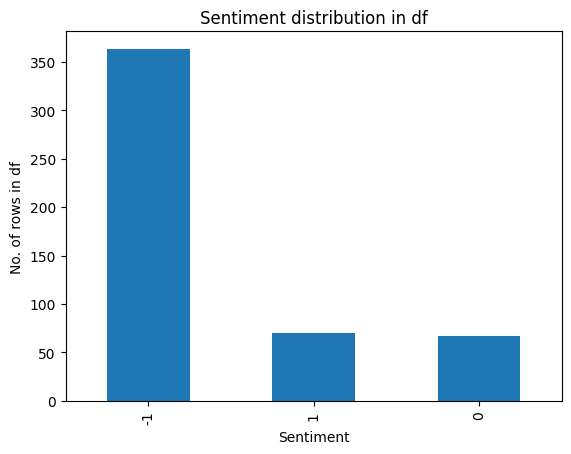

In [12]:
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1


# Mapping stars to sentiment into three categories
df['sentiment'] = [ map_sentiment(x) for x in df['Labels']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4**
This code tokenizes text and stems the words using NLTK tools.

1) It <green>**tokenizes**</green> each sentence in the dataframe <blue>**df['tokenized_text']**</blue> using <blue>**word_tokenize**</blue> from NLTK, applying <green>**list comprehension**</green> to store the tokens as a list.
2) Next, it uses the <blue>**Porter Stemmer**</blue> to <green>**stem**</green> each token in <blue>**df['tokenized_text']**</blue>, storing the stemmed words in <blue>**df['stemmed_tokens']**</blue> using <green>**list comprehension**</green>.

Both processes are applied to make the text more suitable for sentiment classification by reducing it to basic word forms.

In [17]:
# TODO: Tokenize each sentence into word tokens and store them as a list in the dataframe
# Use List Comprehension
import nltk
nltk.download('punkt_tab')
df['tokenized_text'] = [word_tokenize(text) for text in df['Text']] # Replace None with the correct code
print(df['tokenized_text'].head(10))

ps = PorterStemmer()
# TODO: Use the Porter Stemmer to find stem words of each word for all the words in df["tokenized_text"]
# Hint: Use List Comprehension
df['stemmed_tokens'] = [[ps.stem(word) for word in tokens] for tokens in df['tokenized_text']] # Replace None with the correct code
df['stemmed_tokens'].head(10)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


0    [My, expectations, for, McDonalds, are, t, rar...
1    [I, 've, tried, to, give, this, McDonalds, a, ...
2    [This, McDonald, 's, is, so, bad, it, 's, amaz...
3    [We, had, the, worst, possible, experience, at...
4    [They, burned, my, fish, and, they, burned, it...
5    [Some, how, even, though, the, food, at, this,...
6    [Mmm, ..., peppermint, mocha\n\nIn, my, quest,...
7    [If, there, was, ever, a, \, '', get, your, co...
8    [I, just, realized, they, remodeled, this, one...
9    [Great, location, !, Close, to, shops, and, th...
Name: tokenized_text, dtype: object


,stemmed_tokens
0,"[my, expect, for, mcdonald, are, t, rare, high..."
1,"[i, 've, tri, to, give, thi, mcdonald, a, chan..."
2,"[thi, mcdonald, 's, is, so, bad, it, 's, amaz,..."
3,"[we, had, the, worst, possibl, experi, at, the..."
4,"[they, burn, my, fish, and, they, burn, it, ba..."
5,"[some, how, even, though, the, food, at, thi, ..."
6,"[mmm, ..., peppermint, mocha\n\nin, my, quest,..."
7,"[if, there, wa, ever, a, \, '', get, your, cof..."
8,"[i, just, realiz, they, remodel, thi, one, rec..."
9,"[great, locat, !, close, to, shop, and, theatr..."


<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
This code splits the dataset into training and testing sets for model evaluation.
<blue>**split_train_test**</blue> function uses <blue>**train_test_split**</blue> from scikit-learn to divide the dataset into <green>**training (70%)**</green> and <green>**testing (30%)**</green> sets based on the tokenized_text, stemmed_tokens, and other columns.

In [18]:
# Train Test Split Function
def split_train_test(df, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(df[["Text", "Labels", "tokenized_text", "stemmed_tokens"]],
                                                        df['sentiment'],
                                                        shuffle=shuffle_state,
                                                        test_size=test_size,
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
sentiment
-1    255
 1     49
 0     46
Name: count, dtype: int64
Value counts for Test sentiments
sentiment
-1    108
 1     21
 0     21
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index                                               Text  Labels  \
0    139  The food is standard American fare--a bit over...       1   
1    129  I'm not much of a beer drinker, but my fiancee...       3   
2    258  ok so i've eaten here more than once but just ...       1   
3    227  Food was ok had a steak w/ shrimp side Ass mas...       1   
4     60  He was incredibly sexist/homophobic. He could ...       0   

                                      tokenized_text  \
0  [The, food, is, standard, American, fare, --, ...   
1  [I, 'm, not, much, of, a, beer, drinker, ,, bu...   
2  [ok, so, i, 've, eaten, here, more, than, once...   
3  [Food, was, ok, had, a, steak, w/, shrimp, sid...   
4  [He, was, incredi

<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code sets the <blue>**device**</blue> for running the model, either using <green>**GPU**</green> if available or falling back to <green>**CPU**</green>.


In [19]:
# TODO: Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Replace None with the correct code
print("Device available for running: ")
print(device)

Device available for running: 
cpu


<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
This code defines a Feedforward Neural Network model with three fully connected layers using PyTorch.

1) <blue>**fc1**</blue>: First fully connected layer that takes the <green>**input dimension (input_dim)**</green> and maps it to a <green>**hidden dimension (hidden_dim)**</green>.
2) <blue>**fc2**</blue>: Second fully connected layer that maps the <green>**hidden dimension (hidden_dim)**</green> to another <green>**hidden dimension (hidden_dim)**</green>.
3) <blue>**fc3**</blue>: Final layer that maps the <green>**hidden dimension**</green> to the <green>**output dimension (output_dim)**</green>, which corresponds to the sentiment classification.

In [20]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, inputdim, hiddendim, outputdim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Fully connected layers
        self.fc1 = nn.Linear(inputdim, hiddendim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hiddendim, hiddendim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hiddendim, outputdim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return F.softmax(out, dim=1)

<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This code defines a function to create a dictionary of tokens from a DataFrame using Gensim's corpora.Dictionary.

1) <blue>**make_dict**</blue> generates a <green>**token dictionary**</green> from the <blue>**stemmed_tokens**</blue> column in the DataFrame.
2) If <blue>**padding=True**</blue>, it adds a <green>**padding token ('pad')**</green> to the dictionary, which is useful for models that require fixed input sizes.
3) If <blue>**padding=False**</blue>, the dictionary is created directly from the tokenized text <green>**without adding a padding token**</green>.
4) The <blue>**review_dict**</blue> variable stores the dictionary, and in this case, it is created <green>**without padding**</green> by calling the function with <blue>**padding=False**</blue>.

This process is helpful for converting text tokens into numerical indices that can be used as input for machine learning models.

In [21]:
# Function to return the dictionary either with padding word or without padding
def make_dict(top_data_df_small, padding=True):
    if padding:
        print("Dictionary with padded token added")
        review_dict = corpora.Dictionary([['pad']])
        review_dict.add_documents(top_data_df_small['stemmed_tokens'])
    else:
        print("Dictionary without padding")
        review_dict = corpora.Dictionary(top_data_df_small['stemmed_tokens'])
    return review_dict

# Make the dictionary without padding for the basic models
review_dict = make_dict(df, padding=False)

Dictionary without padding


<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 9**
This code creates functions to generate input and target tensors for the neural network.

1) <blue>**make_bow_vector**</blue>: This function creates a <green>**bag-of-words (BOW)**</green> vector from a tokenized sentence.

2) It initializes a <blue>**zero vector**</blue> of size <blue>**VOCAB_SIZE (30,056)**</blue>, where <green>**each index**</green> represents a word from the vocabulary.

3) <blue>**make_target**</blue>: This function converts a <green>**sentiment label (-1, 0, or 1)**</green> into a tensor for the output.

4) <blue>**Negative sentiment (-1)**</blue> maps to <green>**0**</green>, <blue>**neutral sentiment (0)**</blue> maps to <green>**1**</green>, and <blue>**positive sentiment (1)**</blue> maps to <green>**2**</green>.

In [22]:
VOCAB_SIZE = 30056
NUM_LABELS = 3

# Function to make bow vector to be used as input to network
def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[review_dict.token2id[word]] += 1
    return vec.view(1, -1).float()

# Function to get the output tensor
def make_target(label):
    if label == -1:
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == 0:
        return torch.tensor([1], dtype=torch.long, device=device)
    else:
        return torch.tensor([2], dtype=torch.long, device=device)

<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 10**
1) <blue>**Model Initialization**</blue>: The <green>**Feedforward Neural Network**</green> is instantiated with input_dim, hidden_dim, and output_dim.
2) <blue>**Device Transfer**</blue>: The model is moved to the <green>**GPU**</green> or <green>**CPU**</green> as specified earlier.
3) <blue>**Loss Function**</blue>: The loss function is set to <green>**CrossEntropyLoss**</green>, suitable for multi-class classification.
4) <blue>**Optimizer**</blue>: The optimizer is <green>**SGD (Stochastic Gradient Descent)**</green> with a <green>**learning rate**</green> of <green>**1e-3**</green>.

In [24]:
VOCAB_SIZE = len(review_dict)

input_dim = VOCAB_SIZE
hidden_dim = 500
output_dim = 3
num_epochs = 100

# TODO: Call the FeedForwardNeuralNetwork Class object with appropriate arguements
ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim) # Replace None with the correct code

# TODO: Move the model to device
ff_nn_bow_model = ff_nn_bow_model.to(device) # Replace None with the correct code

# TODO: Define the loss function as Cross Entropy Loss
loss_function = nn.CrossEntropyLoss() # Replace None with the correct code

# TODO: Define a Stochastic Gradient Descent Optimizer with learning rate of 1e-3
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=1e-3) # Replace None with the correct code

<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 11**
1) <blue>**Bag-of-Words Vector**</blue>: The <green>**make_bow_vector**</green> function is used to create a BOW vector from the stemmed tokens.
2) <blue>**Forward Pass**</blue>: The <green>**BOW vector**</green> is passed through the <green>**feedforward neural network**</green> to get the output probabilities.
3) <blue>**Loss Calculation**</blue>: The <green>**CrossEntropyLoss**</green> is computed between the output probabilities and the target label.
4) <blue>**Gradient Update**</blue>: <green>**Gradients**</green> are calculated and the parameters are updated using backpropagation and <green>**optimizer.step()**</green>.
5) <blue>**Loss Logging**</blue>: The <green>**average loss per epoch**</green> is written to the loss file for tracking training progress.

In [39]:
ffnn_loss_file_name = 'ffnn_bow_class_big_loss_500_epoch_100_less_lr.csv'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss\n')
losses = []
iter = 0

# Start training
for epoch in range(num_epochs):
    if (epoch+1) % 25 == 0:
        print("Epoch completed: " + str(epoch+1))
    train_loss = 0
    for index, row in X_train.iterrows():
        # Clearing the accumulated gradients
        optimizer.zero_grad()

        # Make the bag of words vector for stemmed tokens
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens']) # Vector shape [1, VOCAB_SIZE], torch.float, on device

        # Forward pass to get output
        probs = ff_nn_bow_model(bow_vec) # Output shape [1, 3] (since output_dim=3)

        # Get the target label (should be tensor([class_index]) with shape [1])
        target = make_target(Y_train['sentiment'][index]) # Tensor shape [1], torch.long, on device

        # Calculate Loss (NO unsqueeze, inputs: [1, 3], target: [1])
        loss = loss_function(probs, target)

        # Accumulating the loss over time
        train_loss += loss.item()

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
    f.write(str((epoch+1)) + "," + str(train_loss/len(X_train)) + "\n")
    train_loss = 0

f.close()


Epoch completed: 25
Epoch completed: 50
Epoch completed: 75
Epoch completed: 100


<style>
blue {
  color: skyblue;
}

green {
  color: lightgreen;
}
</style>

### **Step - 12**
This code evaluates the performance of the trained feedforward neural network on the test dataset and visualizes the loss during training.

1) <blue>**Prediction Loop**</blue>: It iterates through the test set X_test without tracking gradients <green>**(using torch.no_grad())**</green> for efficient inference. For each test sample, it generates a <green>**BOW vector**</green> and passes it through the model to obtain predicted probabilities.

2) <blue>**Classification Report**</blue>: The <green>**classification_report**</green> from <green>**sklearn.metrics**</green> is printed to evaluate the model's performance, displaying precision, recall, F1-score, and support for each class.

3) <blue>**Loss DataFrame**</blue>: The loss data saved in <green>**ffnn_loss_file_name**</green> is read into a DataFrame.

4) <blue>**Loss Plotting**</blue>: The loss is plotted using pandas and saved as a JPEG file named <green>**"ffnn_bow_loss_500_padding_100_epochs_less_lr.jpg"**</green>.

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       108
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        21

    accuracy                           0.72       150
   macro avg       0.24      0.33      0.28       150
weighted avg       0.52      0.72      0.60       150

100
Index(['iter', ' loss'], dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


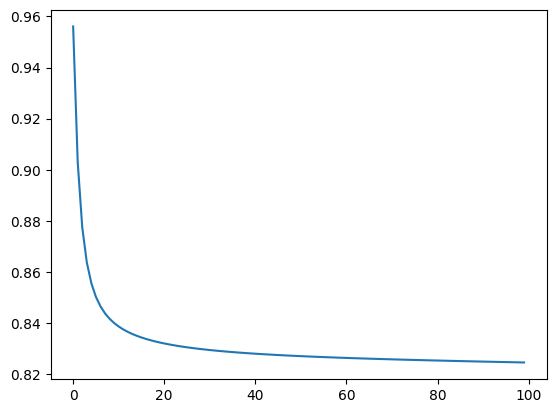

In [40]:
bow_ff_nn_predictions = []
original_lables_ff_bow = []

with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
        probs = ff_nn_bow_model(bow_vec)
        bow_ff_nn_predictions.append(torch.argmax(probs, dim=1).cpu().numpy()[0])
        original_lables_ff_bow.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])

print(classification_report(original_lables_ff_bow,bow_ff_nn_predictions))
ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)
print(len(ffnn_loss_df))
print(ffnn_loss_df.columns)
ffnn_plt_500_padding_100_epochs = ffnn_loss_df[' loss'].plot()
fig = ffnn_plt_500_padding_100_epochs.get_figure()
fig.savefig("ffnn_bow_loss_500_padding_100_epochs_less_lr.jpg")


### Advanced Steps (Optional for people targeting basic level)

### **Step - 13**
This code defines and trains a Feedforward Neural Network model with Dropout for regularization.

1. **Model Initialization**: The **Feedforward Neural Network** is instantiated with input_dim, hidden_dim, output_dim, and a dropout rate.
2. **Device Transfer**: The model is moved to the **GPU** or **CPU**.
3. **Loss Function**: The loss function is set to **CrossEntropyLoss**.
4. **Optimizer**: The optimizer is **SGD (Stochastic Gradient Descent)** with a **learning rate** of **1e-3**.
5. **Training Loop**: The model is trained on the training data, calculating and minimizing the loss using backpropagation and the optimizer.
6. **Loss Logging**: The average loss per epoch is written to a new loss file for tracking training progress.

In [44]:
# Since your class constructor only takes 3 arguments, initialize as:
ff_nn_bow_model_dropout = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model_dropout = ff_nn_bow_model_dropout.to(device)

# Define loss function and optimizer
loss_function_dropout = nn.CrossEntropyLoss()
optimizer_dropout = optim.SGD(ff_nn_bow_model_dropout.parameters(), lr=1e-3)

# Prepare to record training loss
ffnn_loss_file_name_dropout = 'ffnn_bow_class_big_loss_500_epoch_100_less_lr_dropout.csv'
f_dropout = open(ffnn_loss_file_name_dropout, 'w')
f_dropout.write('iter, loss\n')
losses_dropout = []
iter_dropout = 0

# Train the model
ff_nn_bow_model_dropout.train()
for epoch in range(num_epochs):
    if (epoch + 1) % 25 == 0:
        print(f"Epoch completed: {epoch + 1}")

    train_loss_dropout = 0

    for index, row in X_train.iterrows():
        optimizer_dropout.zero_grad()

        # Create bag-of-words input vector and target
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
        probs = ff_nn_bow_model_dropout(bow_vec)
        target = make_target(Y_train['sentiment'][index])

        # Compute loss
        loss = loss_function_dropout(probs, target)
        train_loss_dropout += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer_dropout.step()

    # Log average loss for the epoch
    f_dropout.write(f"{epoch + 1},{train_loss_dropout / len(X_train)}\n")
    train_loss_dropout = 0

f_dropout.close()


Epoch completed: 25
Epoch completed: 50
Epoch completed: 75
Epoch completed: 100


### **Step - 14**
This code evaluates the performance of the trained feedforward neural network with Dropout on the test dataset and visualizes the loss during training, comparing it with the model without dropout.

1. **Prediction Loop**: It iterates through the test set X_test with the dropout model.
2. **Classification Report**: The **classification_report** from **sklearn.metrics** is printed to evaluate the model's performance with dropout.
3. **Loss DataFrame**: The loss data saved for both models is read into DataFrames.
4. **Loss Plotting**: The loss for both models is plotted on the same graph for comparison and saved as a JPEG file.

Classification Report with Dropout:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       108
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        21

    accuracy                           0.72       150
   macro avg       0.24      0.33      0.28       150
weighted avg       0.52      0.72      0.60       150



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


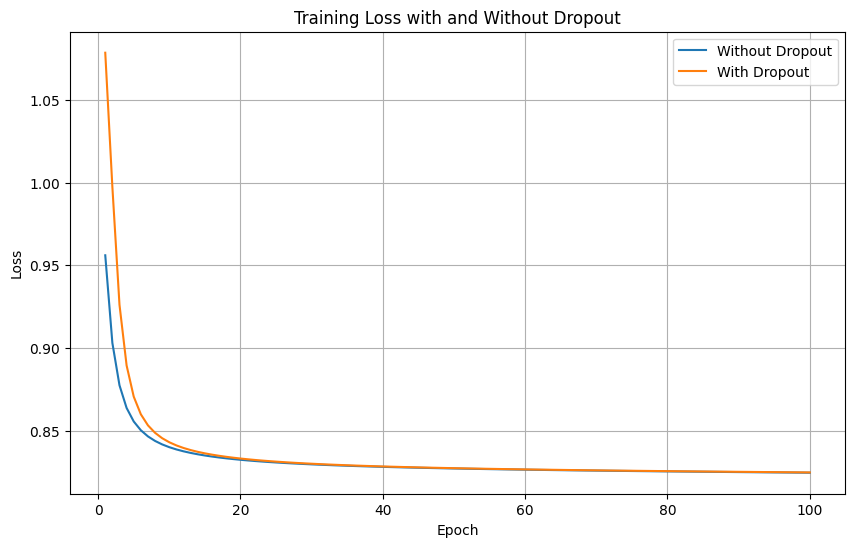

In [45]:
bow_ff_nn_predictions_dropout = []
original_lables_ff_bow_dropout = []

ff_nn_bow_model_dropout.eval() # Set model to evaluation mode
with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
        probs = ff_nn_bow_model_dropout(bow_vec)
        bow_ff_nn_predictions_dropout.append(torch.argmax(probs, dim=1).cpu().numpy()[0])
        original_lables_ff_bow_dropout.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])

print("Classification Report with Dropout:")
print(classification_report(original_lables_ff_bow_dropout, bow_ff_nn_predictions_dropout))

ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)
ffnn_loss_df_dropout = pd.read_csv(ffnn_loss_file_name_dropout)

plt.figure(figsize=(10, 6))
plt.plot(ffnn_loss_df['iter'], ffnn_loss_df[' loss'], label='Without Dropout')
plt.plot(ffnn_loss_df_dropout['iter'], ffnn_loss_df_dropout[' loss'], label='With Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with and Without Dropout')
plt.legend()
plt.grid(True)
plt.savefig("ffnn_bow_loss_comparison_dropout.jpg")
plt.show()